In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([[1,2],[1.5,1.8],[7,8],[8,8],[1,0.6],[8.5,9]]) 

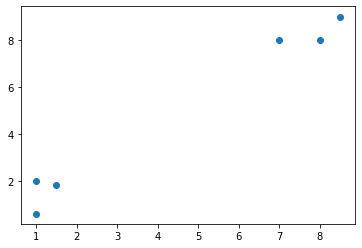

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [7]:
class K_Means:
    def __init__(self,k=2,max_iter=100,means=[]):     
        self.k=k
        self.max_iter=max_iter
        
    def fit(self,data):                              #K is no. of clusters
        self.means=[]
        for i in range(self.k):                      #initializing the means,we will just assign first K data points as initial means 
            self.means.append(data[i])
        for i in range(self.max_iter):
            #assign the data points to clusters:
            clusters=[]
            for j in range(self.k):
                clusters.append([])             #creating an empty clusters
            for point in data:                  #go to each data point

                #find the distance of this point from each mean value:
                #find the minimum of these distances:
                #find the mean for which we get the minimum distance:

                distances=[((point-m)**2).sum() for m in self.means]                #as point is an np array, we can caluclate euclidean distance using elementwise operations
                min_dist=min(distances)
                closest_mean=distances.index(min_dist)

                #add this point to the cluster of that mean:

                clusters[closest_mean].append(point)


            #Get new means for each cluster:

            no_change=0                                        #no. of means in whose value there has been no change from prev. iter
            for j in range(self.k):
                new_mean=np.average(clusters[j],axis=0)        #inbuilt function to get mean of a numpy array
                if np.array_equal(new_mean,self.means[j]):
                    no_change+=1
                self.means[j]=new_mean
            if no_change==self.k:                                   #if this becomes equal to K, we can stop iterating further as there is no change in any mean values form previous iteration
                break
                
    def predict(self,data):
        predictions=[]
        for point in data:
            distances=[((point-m)**2).sum() for m in self.means]             
            min_dist=min(distances)
            closest_mean=distances.index(min_dist)
            predictions.append(closest_mean)
        return predictions

In [8]:
km=K_Means()
km.fit(x)                                                     #gives us the means of the clusters
km.means

[array([1.16666667, 1.46666667]), array([7.83333333, 8.33333333])]

In [9]:
km.predict(x)

[0, 0, 1, 1, 0, 1]